Use case 1- Insurance Fraud Detection

Claim_ID Policy_ID Customer_Age Gender Policy_Type Policy_Tenure Claim_Amount Past_Claims_Count Claim_Cause Vehicle_Age Region Claim_Description Claim_Severity Fraudulent_Claim Reported_Date Settled_Date Settlement_Time Claim_Status CLM1000 PLC5000 23 Male Vehicle 3.9 897955.02 1 Accident 12.1 North Vehicle claim due to accident in North region. High 0 2025-03-28 2025-07-01 95 Settled CLM1001 PLC5001 37 Female Health 0.9 619350.46 1 Illness null North Customer from North filed illness related claim. High 1 2023-05-14 2023-08-30 108 Pending CLM1002 PLC5002 28 Male Vehicle 3.3 404566.62 0 Illness 8.1 East Reported illness damage under Vehicle insurance. Medium 0 2025-08-25 2025-10-21 57 Pending CLM1003 PLC5003 58 Female Vehicle 7.9 167844.72 3 Theft 11.0 North Reported theft damage under Vehicle insurance. Medium 0 2024-07-15 2024-08-08 24 Pending CLM1004 PLC5004 69 Female Vehicle 5.8 102047.56 0 Illness 8.8 North Reported illness damage under Vehicle insurance. Medium 0 2023-10-18 2024-03-15 149 Settled CLM1005 PLC5005 33 Female Home 3.2 930422.99 4 Accident null West Reported accident damage under Home insurance. High 1 2023-11-30 2024-02-07 69 Pending CLM1006 PLC5006 21 Male Health 8.1 799967.01 2 Illness null West Reported illness damage under Health insurance. High 1 2025-02-14 2025-07-02 138 Pending CLM1007 PLC5007 18 Female Health 3.8 221487.15 4 Accident null North Customer from North filed accident related claim. Medium 0 2023-02-06 2023-07-28 172 Pending CLM1008 PLC5008 42 Male Health 7.7 463659.73 0 Natural Disaster null North Health claim due to natural disaster in North region. Medium 0 2025-07-23 2025-11-10 110 Settled CLM1009 PLC5009 60 Male Vehicle 2.3 418613.49 5 Accident 14.8 South Customer from South filed accident related claim. Medium 0 2025-02-08 2025-04-27 78 Rejected CLM1010 PLC5010 69 Female Home 4.4 154318.51 5 Accident null West Home claim due to accident in West region. Medium 0 2023-04-24 2023-07-26 93 Rejected CLM1011 PLC5011 35 Male Health 7.2 431369.12 5 Fire null West Customer from West filed fire related claim. Medium 0 2024-08-15 2025-02-08 177 Rejected CLM1012 PLC5012 33 Male Home 3.4 548766.15 2 Illness null West Reported illness damage under Home insurance. High 0 2024-07-11 2024-09-17 68 Rejected CLM1013 PLC5013 23 Female Vehicle 1.9 280854.3 1 Theft 10.5 East Vehicle claim due to theft in East region. Medium 0 2023-07-11 2023-10-21 102 Settled CLM1014 PLC5014 23 Male Vehicle 1.5 43737.37 1 Natural Disaster 4.8 East Customer from East filed natural disaster related claim. Low 0 2023-12-21 2024-05-12 143 Settled CLM1015 PLC5015 50 Female Home 0.8 219371.32 1 Natural Disaster null West Customer from West filed natural disaster related claim. Medium 0 2025-10-30 2025-12-11 42 Settled CLM1016 PLC5016 21 Male Vehicle 8.3 437072.13 1 Natural Disaster 13.9 South Reported natural disaster damage under Vehicle insurance. Medium 0 2025-02-15 2025-03-31 44 Rejected CLM1017 PLC5017 23 Male Health 4.5 49478.79 2 Natural Disaster null South Reported natural disaster damage under Health insurance. Low 0 2025-08-11 2025-11-27 108 Rejected CLM1018 PLC5018 34 Female Vehicle 6.0 919841.25 0 Fire 11.1 North Vehicle claim due to fire in North region. High 0 2025-06-19 2025-11-02 136 Rejected CLM1019 PLC5019 35 Female Health 5.0 933674.88 4 Accident null East Customer from East filed accident related claim. High 0 2023-08-02 2024-01-11 162 Rejected CLM1020 PLC5020 58 Male Health 7.9 265161.13 5 Natural Disaster null East Health claim due to natural disaster in East region. Medium 0 2023-01-04 2023-02-08 35 Rejected CLM1021 PLC5021 29 Female Home 3.1 913920.04 5 Theft null North Customer from North filed theft related claim. High 0 2024-06-24 2024-07-08 14 Pending CLM1022 PLC5022 18 Female Vehicle 6.5 383283.09 2 Accident 2.6 South Vehicle claim due to accident in South region. Medium 0 2023-09-25 2023-12-05 71 Settled CLM1023 PLC5023 28 Male Health 8.6 892612.26 4 Illness null North Health claim due to illness i

Rows: 10000
Columns: 18


Claim_ID Policy_ID Customer_Age Gender Policy_Type Policy_Tenure Claim_Amount Past_Claims_Count Claim_Cause Vehicle_Age Region Claim_Description Claim_Severity Fraudulent_Claim Reported_Date Settled_Date Settlement_Time Claim_Status 0 0 0 0 0 0 0 0 0 6599 0 0 0 0 0 0 0 0

       Claim_ID Policy_ID  ...  Settlement_Time Claim_Status
count      1972      1972  ...      1972.000000         1972
unique     1972      1972  ...              NaN            3
top     CLM1000   PLC5000  ...              NaN     Rejected
freq          1         1  ...              NaN          665
mean        NaN       NaN  ...        93.198783          NaN
std         NaN       NaN  ...        49.990725          NaN
min         NaN       NaN  ...        10.000000          NaN
25%         NaN       NaN  ...        49.000000          NaN
50%         NaN       NaN  ...        93.000000          NaN
75%         NaN       NaN  ...       136.000000          NaN
max         NaN       NaN  ...       180.000000          NaN

[11 rows x 18 columns]


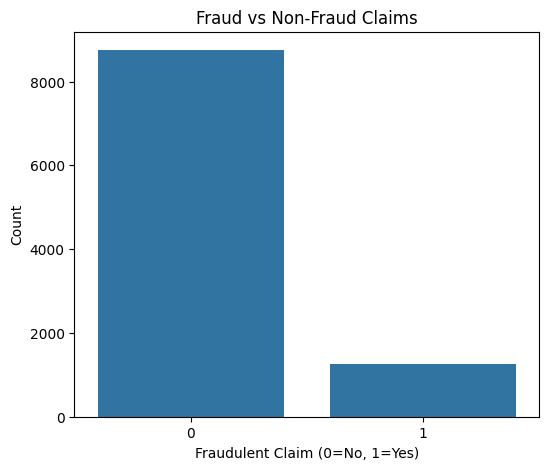

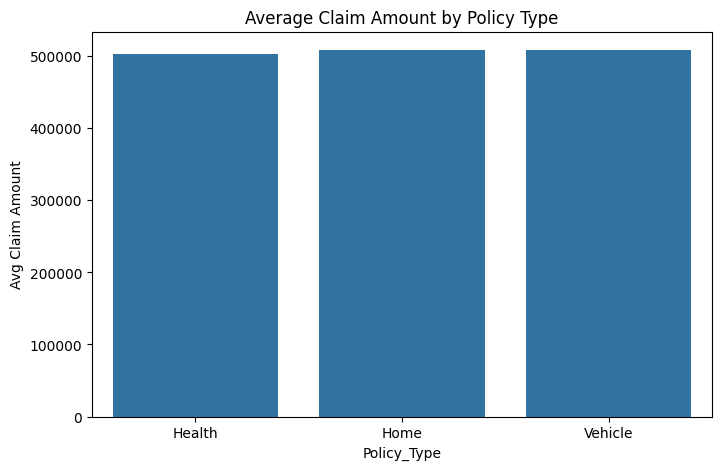

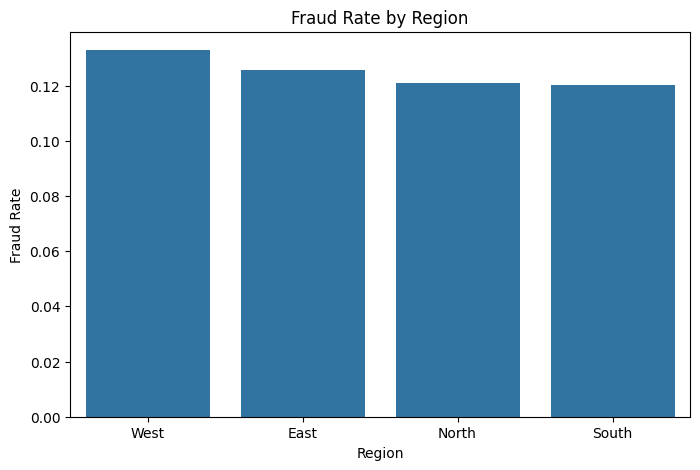

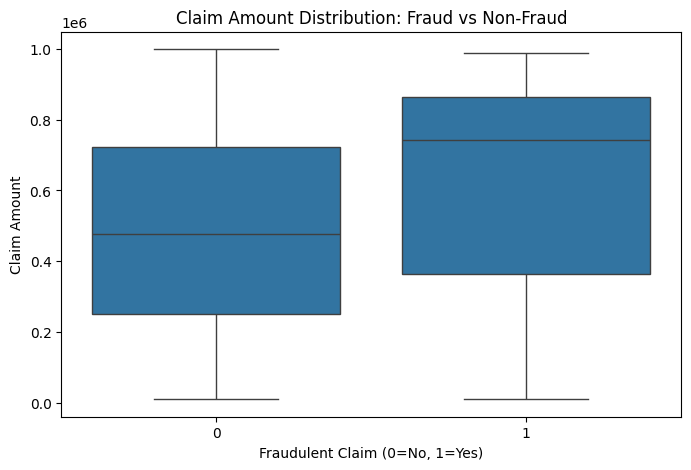

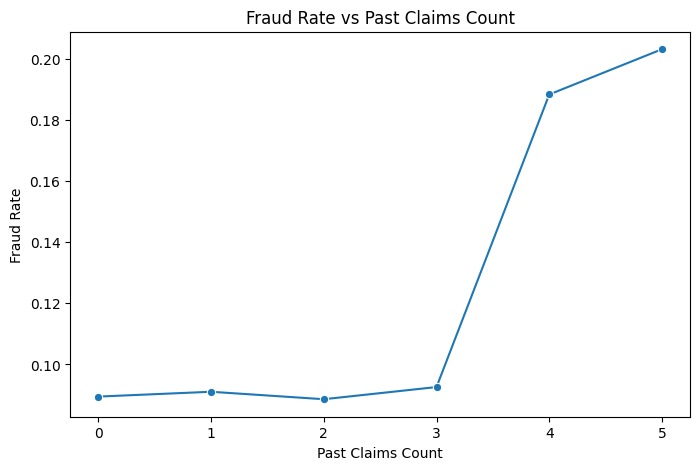

In [0]:
# Databricks notebook source

from pyspark.sql.functions import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load table into Spark DataFrame
df = spark.table("default.insurance_claim_data")

# Show first few rows
display(df)

# Row & column count
print("Rows:", df.count())
print("Columns:", len(df.columns))

# Check missing values
missing = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
display(missing)

# Convert to pandas for summary stats (sample to avoid memory issues)
pdf = df.sample(0.2).toPandas()   # 20% sample for plotting

print(pdf.describe(include='all'))

# ------------------------------
# 1️⃣ Fraud vs Non-Fraud Count
# ------------------------------
fraud_count = df.groupBy("Fraudulent_Claim").count().orderBy("Fraudulent_Claim")
pdf_fraud = fraud_count.toPandas()

plt.figure(figsize=(6,5))
sns.barplot(data=pdf_fraud, x='Fraudulent_Claim', y='count')
plt.title("Fraud vs Non-Fraud Claims")
plt.xlabel("Fraudulent Claim (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

# ------------------------------
# 2️⃣ Average Claim Amount by Policy Type
# ------------------------------
avg_claim = df.groupBy("Policy_Type").avg("Claim_Amount").orderBy("Policy_Type")
pdf_avg_claim = avg_claim.toPandas()

plt.figure(figsize=(8,5))
sns.barplot(data=pdf_avg_claim, x='Policy_Type', y='avg(Claim_Amount)')
plt.title("Average Claim Amount by Policy Type")
plt.ylabel("Avg Claim Amount")
plt.show()

# ------------------------------
# 3️⃣ Fraud Rate by Region
# ------------------------------
fraud_region = df.groupBy("Region") \
                 .agg(avg("Fraudulent_Claim").alias("Fraud_Rate")) \
                 .orderBy("Fraud_Rate", ascending=False)

pdf_fraud_region = fraud_region.toPandas()

plt.figure(figsize=(8,5))
sns.barplot(data=pdf_fraud_region, x='Region', y='Fraud_Rate')
plt.title("Fraud Rate by Region")
plt.ylabel("Fraud Rate")
plt.show()

# ------------------------------
# 4️⃣ Fraud vs Claim Amount (Distribution)
# ------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(data=pdf, x='Fraudulent_Claim', y='Claim_Amount')
plt.title("Claim Amount Distribution: Fraud vs Non-Fraud")
plt.xlabel("Fraudulent Claim (0=No, 1=Yes)")
plt.ylabel("Claim Amount")
plt.show()

# ------------------------------
# ✅ 5️⃣ Past Claims vs Fraud Rate
# ------------------------------
fraud_past = df.groupBy("Past_Claims_Count") \
               .agg(avg("Fraudulent_Claim").alias("Fraud_Rate")) \
               .orderBy("Past_Claims_Count")

pdf_fraud_past = fraud_past.toPandas()

plt.figure(figsize=(8,5))
sns.lineplot(data=pdf_fraud_past, x='Past_Claims_Count', y='Fraud_Rate', marker='o')
plt.title("Fraud Rate vs Past Claims Count")
plt.xlabel("Past Claims Count")
plt.ylabel("Fraud Rate")
plt.show()


In [0]:
try:
    del model
except:
    pass


In [0]:
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Clear model cache if any
try: del model
except: pass

df = spark.table("default.insurance_claim_data")
df = df.fillna({"Vehicle_Age": 0})
df = df.withColumn("Fraudulent_Claim", col("Fraudulent_Claim").cast("int"))


In [0]:
categorical = ["Policy_Type", "Claim_Cause", "Region"]

for col_name in categorical:
    indexer = StringIndexer(inputCol=col_name, outputCol=col_name+"_idx")
    df = indexer.fit(df).transform(df)


In [0]:
numeric_features = [
    "Customer_Age", "Policy_Tenure", "Claim_Amount",
    "Past_Claims_Count", "Vehicle_Age"
]

indexed_features = [c+"_idx" for c in categorical]

final_features = numeric_features + indexed_features


In [0]:
assembler = VectorAssembler(inputCols=final_features, outputCol="features")
df = assembler.transform(df).select("features", "Fraudulent_Claim")


In [0]:
train, test = df.randomSplit([0.8,0.2], seed=42)


In [0]:
model = LogisticRegression(featuresCol="features", labelCol="Fraudulent_Claim").fit(train)


In [0]:
pred = model.transform(test)

evaluator = BinaryClassificationEvaluator(labelCol="Fraudulent_Claim")
auc = evaluator.evaluate(pred)

print("✅ Model AUC:", auc)
display(pred.select("Fraudulent_Claim","prediction","probability").limit(10))


✅ Model AUC: 0.7082240191351502


Fraudulent_Claim prediction probability 0 0.0 {"type":"1","size":null,"indices":null,"values":["0.7097712741043541","0.29022872589564586"]} 0 0.0 {"type":"1","size":null,"indices":null,"values":["0.9522979796097228","0.047702020390277156"]} 0 0.0 {"type":"1","size":null,"indices":null,"values":["0.9477443085922294","0.052255691407770644"]} 0 0.0 {"type":"1","size":null,"indices":null,"values":["0.8065947617627257","0.1934052382372743"]} 0 0.0 {"type":"1","size":null,"indices":null,"values":["0.8938640039807855","0.10613599601921453"]} 0 0.0 {"type":"1","size":null,"indices":null,"values":["0.9295277607691017","0.07047223923089829"]} 0 0.0 {"type":"1","size":null,"indices":null,"values":["0.9531015838535035","0.04689841614649648"]} 1 0.0 {"type":"1","size":null,"indices":null,"values":["0.9179661327923329","0.08203386720766714"]} 0 0.0 {"type":"1","size":null,"indices":null,"values":["0.8267980294156578","0.17320197058434217"]} 0 0.0 {"type":"1","size":null,"indices":null,"values":["0.9681545428112207","0.03184545718877929"]}

Use case 2- Claim Severity Model

In [0]:
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Clear previous model cache (to avoid memory error)
try:
    del model
except:
    pass

# Load data
df = spark.table("default.insurance_claim_data")
df = df.fillna({"Vehicle_Age": 0})


In [0]:
severity_indexer = StringIndexer(
    inputCol="Claim_Severity",
    outputCol="Severity_Label"
)

df = severity_indexer.fit(df).transform(df)


In [0]:
numeric_features = [
    "Customer_Age", "Policy_Tenure", "Claim_Amount",
    "Past_Claims_Count", "Vehicle_Age"
]

categorical = ["Policy_Type", "Claim_Cause", "Region"]


In [0]:
for c in categorical:
    indexer = StringIndexer(inputCol=c, outputCol=c+"_idx")
    df = indexer.fit(df).transform(df)


In [0]:
final_features = numeric_features + [c+"_idx" for c in categorical]

assembler = VectorAssembler(
    inputCols=final_features,
    outputCol="features"
)

df = assembler.transform(df).select("features", "Severity_Label")


In [0]:
train, test = df.randomSplit([0.8, 0.2], seed=42)


In [0]:
model = DecisionTreeClassifier(
    featuresCol="features",
    labelCol="Severity_Label",
    maxDepth=5
).fit(train)


In [0]:
pred = model.transform(test)
display(pred.select("Severity_Label", "prediction").limit(10))


Severity_Label prediction 0.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 2.0 2.0 1.0 1.0 0.0 0.0 2.0 2.0

In [0]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="Severity_Label",
    predictionCol="prediction",
    metricName="accuracy"
)

accuracy = evaluator.evaluate(pred)
accuracy


0.9812597605413846

In [0]:
pred.groupBy("Severity_Label", "prediction").count().orderBy("Severity_Label").show()


+--------------+----------+-----+
|Severity_Label|prediction|count|
+--------------+----------+-----+
|           0.0|       1.0|   30|
|           0.0|       0.0|  949|
|           1.0|       2.0|    1|
|           1.0|       0.0|    5|
|           1.0|       1.0|  767|
|           2.0|       2.0|  169|
+--------------+----------+-----+



Use case 3- Predicting Claim Settlement Time (Regression Model)

In [0]:
# ----------------------------
# Settlement Time Classification Model (Fast / Medium / Slow)
# ----------------------------

from pyspark.sql.functions import when, col
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Clear model if exists to avoid memory overflow
try: del model
except: pass

# ✅ Load Base Data
df = spark.table("default.insurance_claim_data")
df = df.fillna({"Vehicle_Age": 0})


# ✅ Create Settlement Buckets
df = df.withColumn(
    "Settlement_Class",
    when(col("Settlement_Time") <= 30, "Fast")
    .when(col("Settlement_Time") <= 90, "Medium")
    .otherwise("Slow")
)

# ✅ Encode Target
df = StringIndexer(inputCol="Settlement_Class", outputCol="Settlement_Label").fit(df).transform(df)

# ✅ Encode Categorical Features
categorical = ["Policy_Type", "Claim_Cause", "Region"]

for c in categorical:
    df = StringIndexer(inputCol=c, outputCol=f"{c}_idx").fit(df).transform(df)

# ✅ Feature Assembly
numeric_features = ["Customer_Age","Policy_Tenure","Claim_Amount","Past_Claims_Count","Vehicle_Age"]
final_features = numeric_features + [c+"_idx" for c in categorical]

assembler = VectorAssembler(inputCols=final_features, outputCol="features")
df = assembler.transform(df).select("features","Settlement_Label")

# ✅ Train/Test Split
train, test = df.randomSplit([0.8, 0.2], seed=42)

# ✅ Train Decision Tree
model = DecisionTreeClassifier(
    featuresCol="features",
    labelCol="Settlement_Label",
    maxDepth=6
).fit(train)

# ✅ Predict
pred = model.transform(test)

# ✅ Evaluate
evaluator = MulticlassClassificationEvaluator(labelCol="Settlement_Label", metricName="accuracy")
accuracy = evaluator.evaluate(pred)

print("✅ Settlement Classification Accuracy:", accuracy)

# ✅ Confusion Matrix
pred.groupBy("Settlement_Label","prediction").count().orderBy("Settlement_Label").show()


✅ Settlement Classification Accuracy: 0.5143154606975534
+----------------+----------+-----+
|Settlement_Label|prediction|count|
+----------------+----------+-----+
|             0.0|       1.0|   93|
|             0.0|       0.0|  918|
|             0.0|       2.0|    6|
|             1.0|       2.0|    4|
|             1.0|       0.0|  603|
|             1.0|       1.0|   70|
|             2.0|       1.0|   24|
|             2.0|       0.0|  203|
+----------------+----------+-----+



Use case 4- Fraud Hotspot Analysis by Region

In [0]:
# Mini Use Case: Fraud Hotspot by Region

df = spark.table("default.insurance_claim_data")

fraud_region = (
    df.groupBy("Region")
      .agg(
          count("*").alias("Total_Claims"),
          avg("Fraudulent_Claim").alias("Fraud_Rate")
      )
      .orderBy(col("Fraud_Rate").desc())
)

display(fraud_region)


Region Total_Claims Fraud_Rate West 2439 0.13284132841328414 East 2465 0.1257606490872211 North 2541 0.12081857536402991 South 2555 0.12015655577299413

Use case 5 - Claim Trends & Business Insights


In [0]:
# Mini Use Case B: Claims Trend & Insights

from pyspark.sql.functions import month

df = spark.table("default.insurance_claim_data")

# Claim Volume by Policy Type
print("📊 Claim Count by Policy Type")
display(df.groupBy("Policy_Type").count())

# Average Claim Amount by Policy Type
print("💰 Avg Claim Amount by Policy Type")
display(df.groupBy("Policy_Type").avg("Claim_Amount"))

# Monthly Claim Trend
print("📅 Monthly Claim Trend")
display(
    df.withColumn("Month", month("Reported_Date"))
      .groupBy("Month")
      .count()
      .orderBy("Month")
)


📊 Claim Count by Policy Type


Policy_Type count Vehicle 3401 Health 3297 Home 3302

💰 Avg Claim Amount by Policy Type


Policy_Type avg(Claim_Amount) Vehicle 507796.1821758319 Health 503303.02759478317 Home 508343.4119897026

📅 Monthly Claim Trend


Month count 1 809 2 821 3 860 4 814 5 897 6 792 7 836 8 826 9 801 10 870 11 829 12 845